In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, roc_auc_score
import seaborn as sns

In [2]:
# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Define a function to create and evaluate deep learning models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(X_test, y_test)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    
    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    
    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{model_name} Learning Curve')
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    # ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    # Precision-Recall Curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()
    
    print(f"{model_name} - Test Loss: {loss}, Test Accuracy: {accuracy}")
    print(f"{model_name} - F1 Score: {f1}")
    print(f"{model_name} - Recall: {recall}")
    print(f"{model_name} - Precision: {precision}")
    print(f"{model_name} - ROC AUC: {roc_auc}")
    print(f"{model_name} - PR AUC: {pr_auc}")

In [4]:
# Create empty lists to store the results
model_names = ['Feedforward Neural Network', 'Convolutional Neural Network', 'Long Short-Term Memory (LSTM)', 'Gated Recurrent Unit (GRU)']
test_losses = []
test_accuracies = []
f1_scores = []
recalls = []
precisions = []

# Define the models
models = [
    keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ]),
    keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Reshape((X_train.shape[1], 1)),
        layers.Conv1D(64, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ]),
    keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Reshape((X_train.shape[1], 1)),
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]),
    keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Reshape((X_train.shape[1], 1)),
        layers.GRU(64, activation='relu', return_sequences=True),
        layers.GRU(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
]

Epoch 1/50
12/12 - 1s - loss: 0.5251 - accuracy: 0.7692 - val_loss: 0.3052 - val_accuracy: 0.9560 - 1s/epoch - 123ms/step
Epoch 2/50
12/12 - 0s - loss: 0.2752 - accuracy: 0.9396 - val_loss: 0.1855 - val_accuracy: 0.9560 - 75ms/epoch - 6ms/step
Epoch 3/50
12/12 - 0s - loss: 0.1784 - accuracy: 0.9588 - val_loss: 0.1414 - val_accuracy: 0.9451 - 70ms/epoch - 6ms/step
Epoch 4/50
12/12 - 0s - loss: 0.1265 - accuracy: 0.9643 - val_loss: 0.1178 - val_accuracy: 0.9670 - 64ms/epoch - 5ms/step
Epoch 5/50
12/12 - 0s - loss: 0.0981 - accuracy: 0.9753 - val_loss: 0.1058 - val_accuracy: 0.9670 - 81ms/epoch - 7ms/step
Epoch 6/50
12/12 - 0s - loss: 0.0866 - accuracy: 0.9835 - val_loss: 0.0974 - val_accuracy: 0.9780 - 69ms/epoch - 6ms/step
Epoch 7/50
12/12 - 0s - loss: 0.0697 - accuracy: 0.9808 - val_loss: 0.0934 - val_accuracy: 0.9780 - 70ms/epoch - 6ms/step
Epoch 8/50
12/12 - 0s - loss: 0.0682 - accuracy: 0.9808 - val_loss: 0.0931 - val_accuracy: 0.9670 - 68ms/epoch - 6ms/step
Epoch 9/50
12/12 - 0s - 

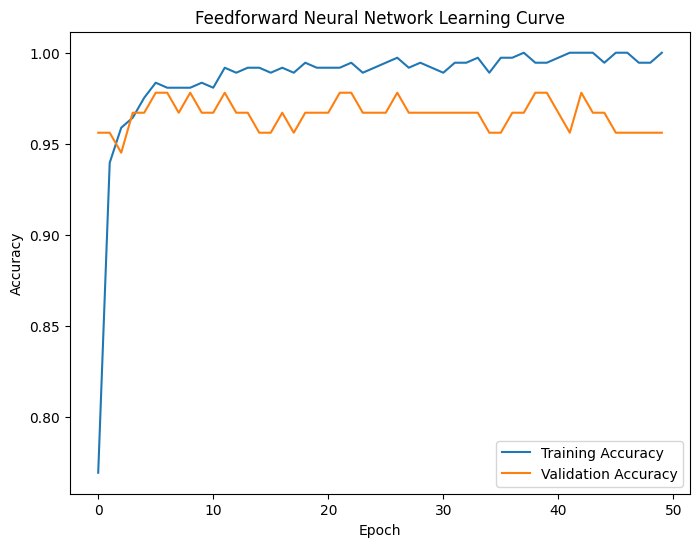

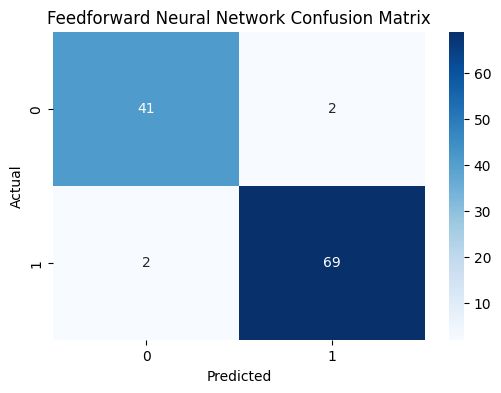

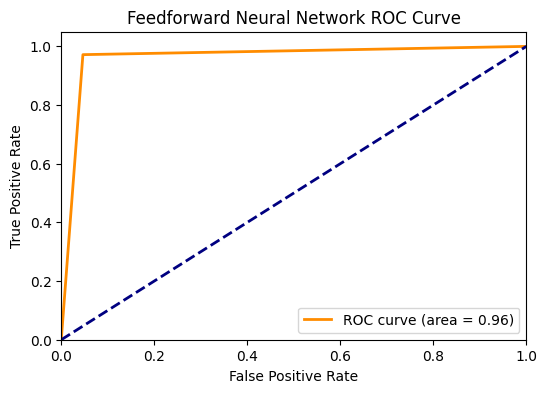

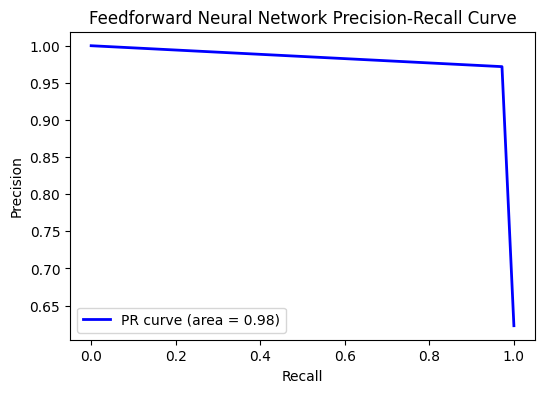

Feedforward Neural Network - Test Loss: 0.09399620443582535, Test Accuracy: 0.9649122953414917
Feedforward Neural Network - F1 Score: 0.971830985915493
Feedforward Neural Network - Recall: [1.         0.97183099 0.        ]
Feedforward Neural Network - Precision: [0.62280702 0.97183099 1.        ]
Feedforward Neural Network - ROC AUC: 0.9626596790042582
Feedforward Neural Network - PR AUC: 0.9806029157400543
4/4 [==============================] - 0s 2ms/step
Epoch 1/50
12/12 - 1s - loss: 0.4100 - accuracy: 0.8654 - val_loss: 0.2006 - val_accuracy: 0.9451 - 1s/epoch - 111ms/step
Epoch 2/50
12/12 - 0s - loss: 0.1460 - accuracy: 0.9560 - val_loss: 0.1364 - val_accuracy: 0.9341 - 92ms/epoch - 8ms/step
Epoch 3/50
12/12 - 0s - loss: 0.0993 - accuracy: 0.9698 - val_loss: 0.1227 - val_accuracy: 0.9341 - 101ms/epoch - 8ms/step
Epoch 4/50
12/12 - 0s - loss: 0.0807 - accuracy: 0.9753 - val_loss: 0.1150 - val_accuracy: 0.9341 - 95ms/epoch - 8ms/step
Epoch 5/50
12/12 - 0s - loss: 0.0799 - accuracy:

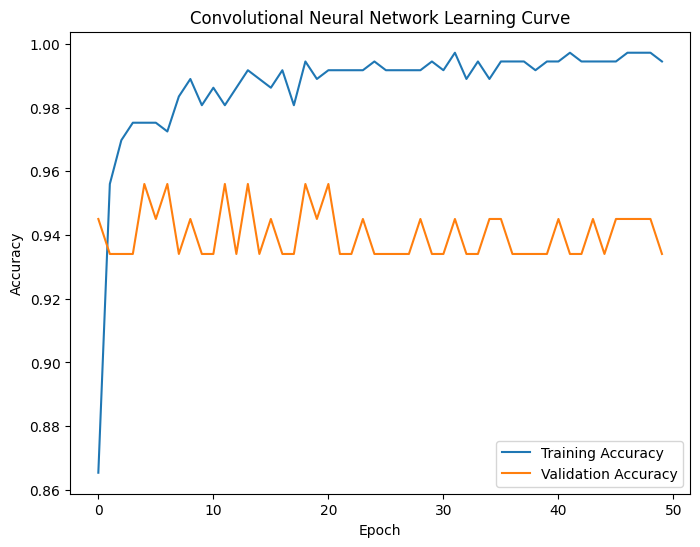

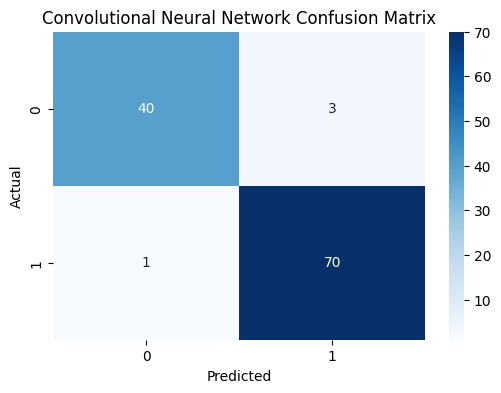

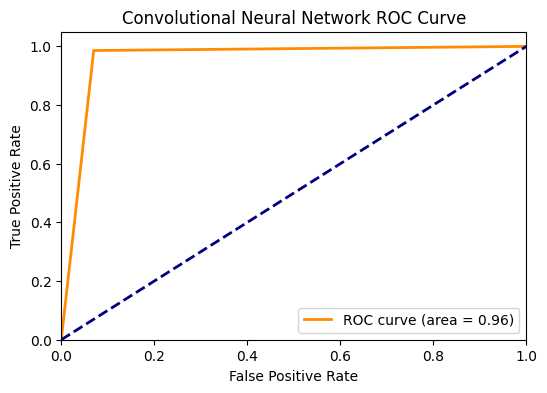

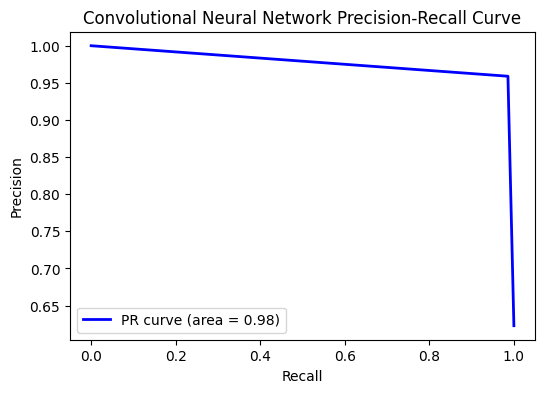

Convolutional Neural Network - Test Loss: 0.11042851209640503, Test Accuracy: 0.9649122953414917
Convolutional Neural Network - F1 Score: 0.9722222222222222
Convolutional Neural Network - Recall: [1.         0.98591549 0.        ]
Convolutional Neural Network - Precision: [0.62280702 0.95890411 1.        ]
Convolutional Neural Network - ROC AUC: 0.9580740255486406
Convolutional Neural Network - PR AUC: 0.9767957661856744
4/4 [==============================] - 0s 3ms/step
Epoch 1/50
12/12 - 4s - loss: 0.6617 - accuracy: 0.8159 - val_loss: 0.6105 - val_accuracy: 0.9011 - 4s/epoch - 353ms/step
Epoch 2/50
12/12 - 0s - loss: 0.6639 - accuracy: 0.8874 - val_loss: 0.5941 - val_accuracy: 0.8681 - 421ms/epoch - 35ms/step
Epoch 3/50
12/12 - 0s - loss: 0.3999 - accuracy: 0.8874 - val_loss: 0.3471 - val_accuracy: 0.8352 - 437ms/epoch - 36ms/step
Epoch 4/50
12/12 - 0s - loss: 0.3594 - accuracy: 0.8984 - val_loss: 0.3290 - val_accuracy: 0.9011 - 439ms/epoch - 37ms/step
Epoch 5/50
12/12 - 0s - loss: 

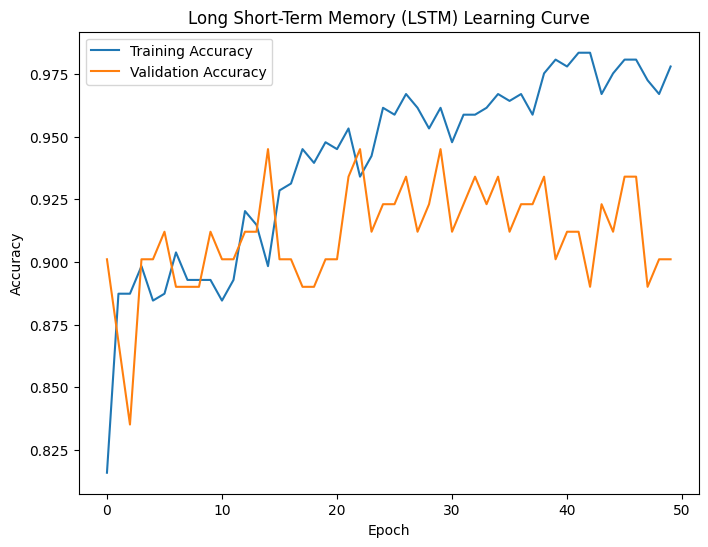

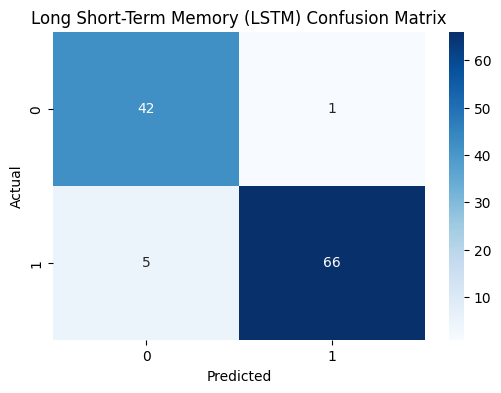

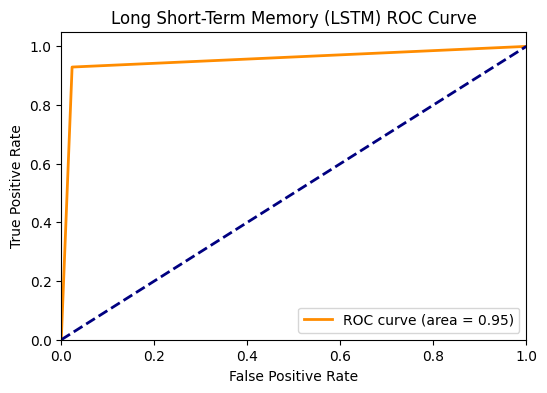

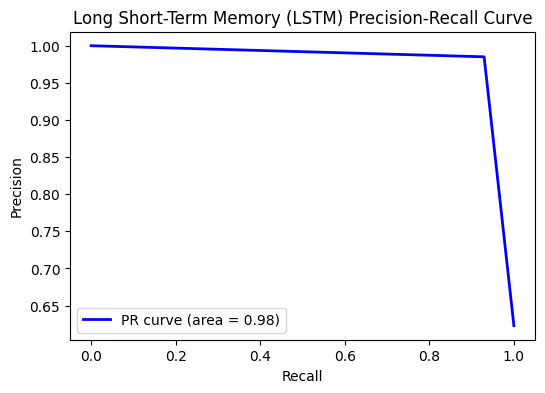

Long Short-Term Memory (LSTM) - Test Loss: 0.11808785796165466, Test Accuracy: 0.9473684430122375
Long Short-Term Memory (LSTM) - F1 Score: 0.9565217391304348
Long Short-Term Memory (LSTM) - Recall: [1.         0.92957746 0.        ]
Long Short-Term Memory (LSTM) - Precision: [0.62280702 0.98507463 1.        ]
Long Short-Term Memory (LSTM) - ROC AUC: 0.9531608254176219
Long Short-Term Memory (LSTM) - PR AUC: 0.9792558703886055
4/4 [==============================] - 0s 12ms/step
Epoch 1/50
12/12 - 5s - loss: 0.6590 - accuracy: 0.8544 - val_loss: 0.6176 - val_accuracy: 0.8681 - 5s/epoch - 383ms/step
Epoch 2/50
12/12 - 0s - loss: 0.5880 - accuracy: 0.8709 - val_loss: 0.5235 - val_accuracy: 0.8681 - 434ms/epoch - 36ms/step
Epoch 3/50
12/12 - 0s - loss: 0.4630 - accuracy: 0.8956 - val_loss: 0.3338 - val_accuracy: 0.9121 - 462ms/epoch - 38ms/step
Epoch 4/50
12/12 - 0s - loss: 0.3224 - accuracy: 0.8901 - val_loss: 0.2722 - val_accuracy: 0.8901 - 432ms/epoch - 36ms/step
Epoch 5/50
12/12 - 0s -

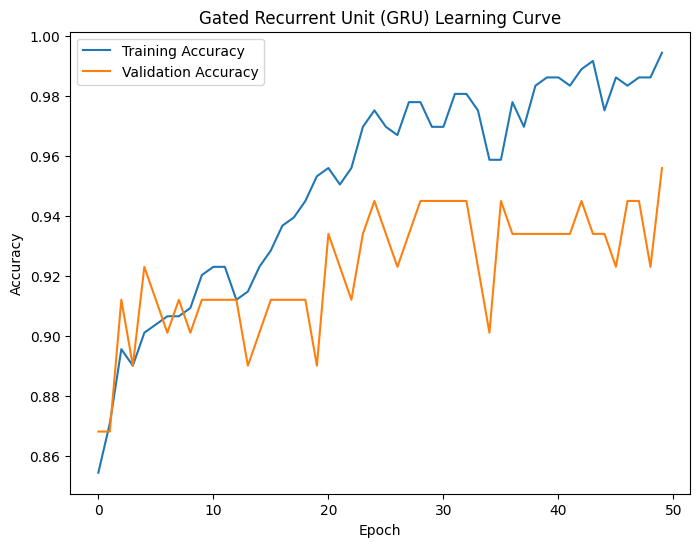

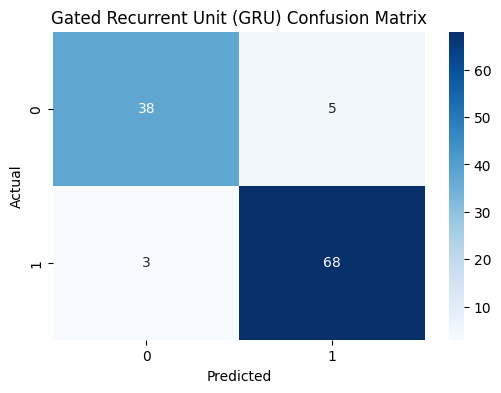

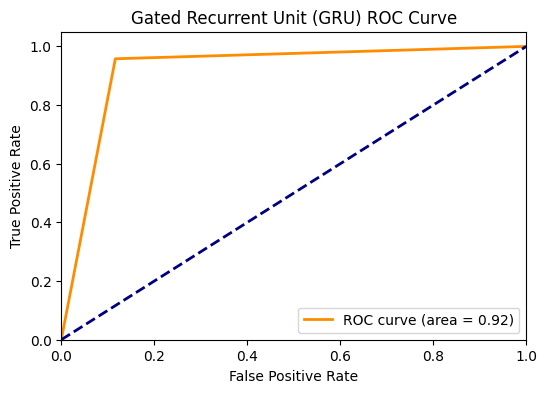

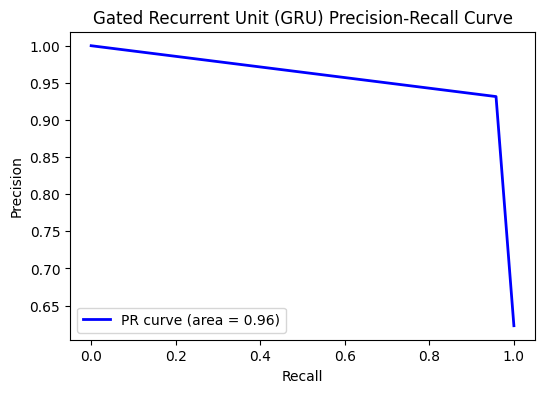

Gated Recurrent Unit (GRU) - Test Loss: 0.15710464119911194, Test Accuracy: 0.9298245906829834
Gated Recurrent Unit (GRU) - F1 Score: 0.9444444444444444
Gated Recurrent Unit (GRU) - Recall: [1.         0.95774648 0.        ]
Gated Recurrent Unit (GRU) - Precision: [0.62280702 0.93150685 1.        ]
Gated Recurrent Unit (GRU) - ROC AUC: 0.9207337045528988
Gated Recurrent Unit (GRU) - PR AUC: 0.9577845588309961
4/4 [==============================] - 0s 10ms/step


In [5]:
# Train and evaluate the models
for model, model_name in zip(models, model_names):
    train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name)
    
    # Calculate and append the results to the lists
    loss, accuracy = model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    test_losses.append(loss)
    test_accuracies.append(accuracy)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

In [6]:
# Create a dictionary to store the results
results = {
    'Model': model_names,
    'Test Loss': test_losses,
    'Test Accuracy': test_accuracies,
    'F1 Score': f1_scores,
    'Recall': recalls,
    'Precision': precisions
}

# Table
table = f"{'Model':<30}{'Test Loss':<15}{'Test Accuracy':<15}{'F1 Score':<15}{'Recall':<15}{'Precision':<15}\n"
for model_name, loss, accuracy, f1, recall, precision in zip(model_names, test_losses, test_accuracies, f1_scores, recalls, precisions):
    table += f"{model_name:<30}{loss:<15.4f}{accuracy:<15.4f}{f1:<15.4f}{recall:<15.4f}{precision:<15.4f}\n"
print(table)

Model                         Test Loss      Test Accuracy  F1 Score       Recall         Precision      
Feedforward Neural Network    0.0940         0.9649         0.9718         0.9718         0.9718         
Convolutional Neural Network  0.1104         0.9649         0.9722         0.9859         0.9589         
Long Short-Term Memory (LSTM) 0.1181         0.9474         0.9565         0.9296         0.9851         
Gated Recurrent Unit (GRU)    0.1571         0.9298         0.9444         0.9577         0.9315         

